# Multi-layer Perceptron with theano

The 8th KIAS CAC Summer School 

Machine Learning Practice II - Multi-layer Neural Networks example

Author: Yung-Kyun Noh, Ph.D.


#### We added one more layer from the logistic regression example.

In [1]:
import theano
import theano.tensor as T
import numpy as np
import matplotlib.pyplot as plt


%pylab inline
floatX = theano.config.floatX

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)


Populating the interactive namespace from numpy and matplotlib


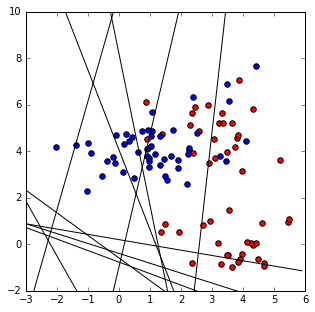

In [2]:
n_data = 50
## Gaussian data
#data1 = np.random.multivariate_normal([4,0], [[1,0],[0,1]], n_data)
#data2 = np.random.multivariate_normal([0,4], [[1,0],[0,1]], n_data)
## Gaussian mixture data
data1_1 = np.random.multivariate_normal([4,0], [[1,0],[0,1]], n_data/2)
data1_2 = np.random.multivariate_normal([3,5], [[1,0],[0,1]], n_data/2)
data1 = concatenate((data1_1,data1_2), axis=0)
data2_1 = np.random.multivariate_normal([0,4], [[1,0],[0,1]], n_data/2)
data2_2 = np.random.multivariate_normal([2,4], [[1,0],[0,1]], n_data/2)
data2 = concatenate((data2_1,data2_2), axis=0)

data_x = np.vstack([data1,data2])
data_y = np.hstack([np.ones((n_data,)), -np.ones((n_data,))])
shared_x = theano.shared(np.asarray(data_x, dtype=floatX), name='data_x')
shared_y = theano.shared(np.asarray(data_y, dtype=floatX), name='data_y')

#n_hiddn = 3
n_hiddn = 10
W1 = theano.shared(np.random.randn(2,n_hiddn), name='W1')
b1 = theano.shared(np.random.randn(n_hiddn), name='b1')
w = theano.shared(np.ones((n_hiddn,1), dtype=floatX), name='w')
b = theano.shared(np.zeros((1,), dtype=floatX), name='b')

def draw_state(n_hiddn):
    plt.rcParams['figure.figsize']=(5,5)
    plt.scatter(data1[:,0],data1[:,1],30,'r')
    plt.scatter(data2[:,0],data2[:,1],30,'b')
    [x1min,x1max,x2min,x2max] = plt.axis()
    x1val = np.arange(x1min,x1max,0.1)
    W1val = W1.get_value(borrow=True)
    b1val = b1.get_value(borrow=True)
    for iHNode in range(n_hiddn):
        plt.plot(x1val, -(W1val[0,iHNode]*x1val+b1val[iHNode])/W1val[1,iHNode], 'k')
        plt.axis([x1min,x1max,x2min,x2max])
    plt.show()
    

draw_state(n_hiddn)

## Multilayer Perceptron


\begin{eqnarray}
P(y|\mathbf{x};\mathbf{w},W_1, b, \mathbf{b}_1) &=& \frac{1}{1 + \exp(-y(\mathbf{w}^\top\phi(\mathbf{x}; W_1,\mathbf{b}_1) + b))}, \quad y\in\{-1,1\}, \\
\phi(\mathbf{x}; W_1,\mathbf{b}) &=& \left(\begin{array}{c}
\phi_1(\mathbf{x}; W_1,\mathbf{b}) \\
\vdots \\
\phi_H(\mathbf{x}; W_1,\mathbf{b})
\end{array}\right), \\
\phi_h(\mathbf{x}; W_1,\mathbf{b}) &=& \frac{1}{1 + \exp(-[W_1^\top\mathbf{x} + \mathbf{b}_1]_h)}, \quad h\in\{1,\ldots,H\}\\\\
\end{eqnarray}

The objective function $L$ with $\mathcal{D}=\{\mathbf{x}_i,y_i\}_{i = 1}^N$ is
\begin{eqnarray}
P(y_1,\ldots,y_N|\mathbf{x}_1,\ldots,\mathbf{x}_N; \mathbf{w}, W_1, b, \mathbf{b}_1) = \prod_{i = 1}^N P(y = y_i|\mathbf{x} = \mathbf{x}_i; \mathbf{w}, W_1, b, \mathbf{b}_1)
\end{eqnarray}
\begin{eqnarray}
\min_{\mathbf{w}, W_1, b, \mathbf{b}_1} L = -\sum_{i = 1}^N \ln P(y_i|\mathbf{x}_i; \mathbf{w}, W_1, b, \mathbf{b}_1) + \lambda (||\mathbf{w}||^2 + ||\mathbf{W_1}||^2)
\end{eqnarray}

In [3]:
x = T.matrix('x')
y = T.vector('y')
p_H = 1/(1+T.exp(-(T.dot(x, W1) + b1)))
p_y = 1/(1+T.exp(-(T.dot(p_H, w) + b)*T.reshape(y,(-1,1))))
loss = T.mean(-T.log(p_y)) + 10**-3*(w.norm(2) + W1.norm(2))

## Gradient Descent

In [4]:
wgrad = T.grad(loss, w)
bgrad = T.grad(loss, b)
W1grad = T.grad(loss, W1)
b1grad = T.grad(loss, b1)
lr = 0.1

train = theano.function([], loss, givens=[(x,shared_x), (y,shared_y)], 
                        updates=[(W1,W1-lr*W1grad), (b1,b1-lr*b1grad), (w,w-lr*wgrad), (b,b-lr*bgrad)])

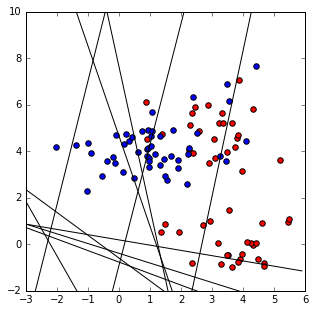

loss: 1.64034085332, w norm: 3.11519598961, W1.norm: 4.14321209093


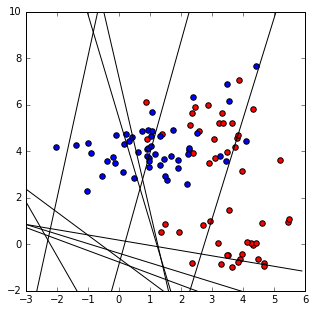

loss: 1.52641082074, w norm: 3.07117581367, W1.norm: 4.14591376077


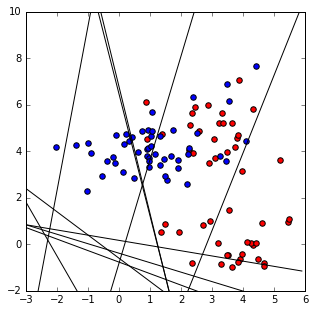

loss: 1.42176779634, w norm: 3.03014731407, W1.norm: 4.14899351013


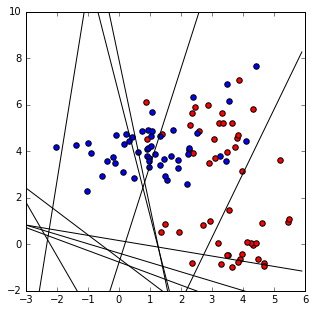

loss: 1.3261779446, w norm: 2.99202775955, W1.norm: 4.15237338963


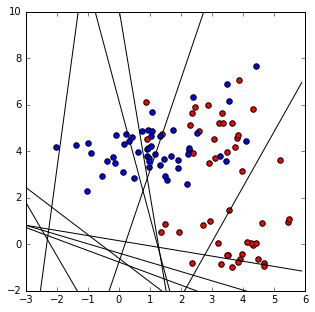

loss: 1.23927680768, w norm: 2.95672035217, W1.norm: 4.15598234731


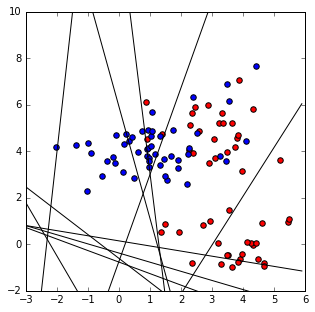

loss: 1.16061992105, w norm: 2.92411851883, W1.norm: 4.15975860221


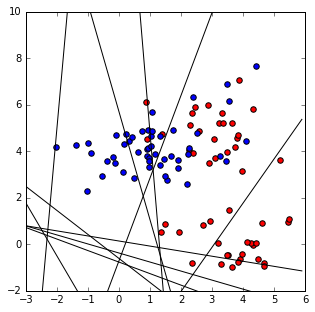

loss: 1.08971988989, w norm: 2.89410543442, W1.norm: 4.1636500318


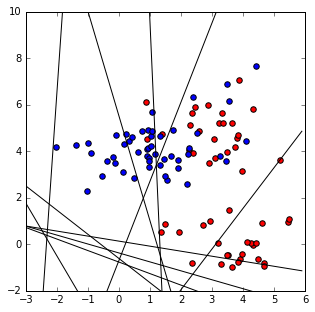

loss: 1.02606635463, w norm: 2.86655640602, W1.norm: 4.16761347893


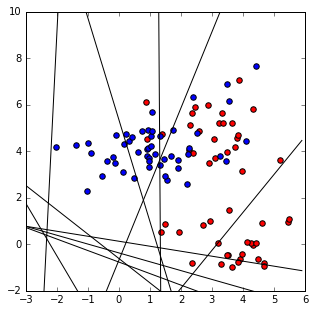

loss: 0.969135435021, w norm: 2.84133934975, W1.norm: 4.1716136982


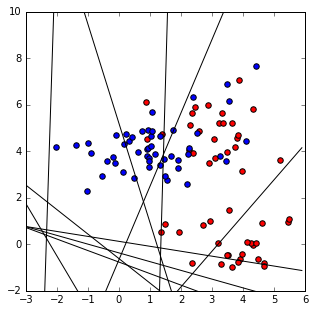

loss: 0.918396235217, w norm: 2.81831717491, W1.norm: 4.1756222897


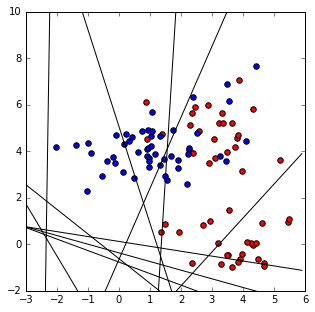

loss: 0.87331769606, w norm: 2.79735064507, W1.norm: 4.17961672275


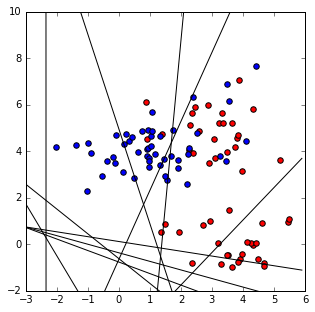

loss: 0.833376533345, w norm: 2.77830004692, W1.norm: 4.18357945631


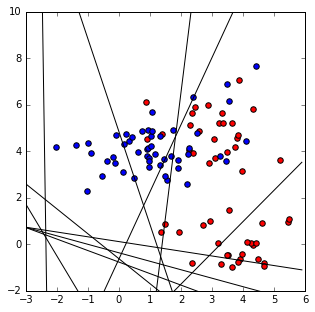

loss: 0.79806537826, w norm: 2.7610270977, W1.norm: 4.18749714738


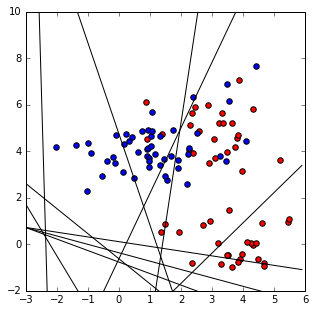

loss: 0.766899948757, w norm: 2.745398283, W1.norm: 4.19135994199


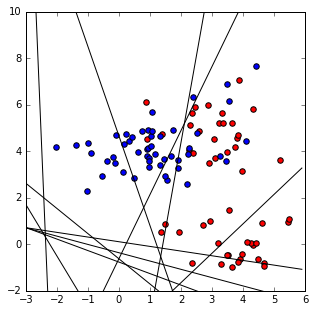

loss: 0.739424963138, w norm: 2.73128437996, W1.norm: 4.19516084944


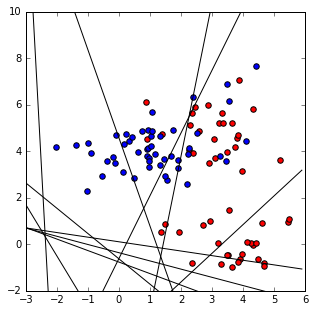

loss: 0.715218150639, w norm: 2.718562603, W1.norm: 4.19889520002


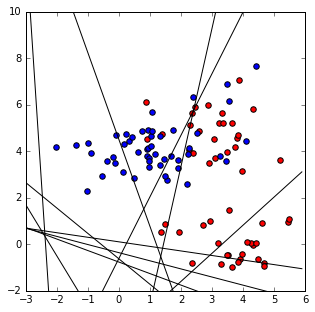

loss: 0.693892606761, w norm: 2.70711779594, W1.norm: 4.20256018271


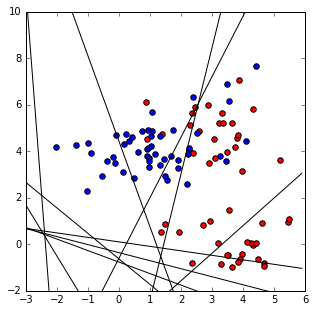

loss: 0.675097515771, w norm: 2.6968421936, W1.norm: 4.20615445695


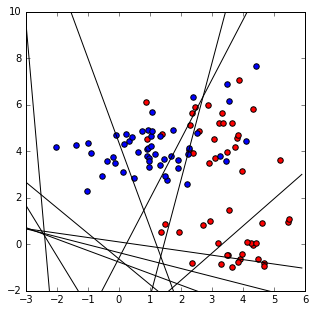

loss: 0.658517727155, w norm: 2.68763542175, W1.norm: 4.20967783051


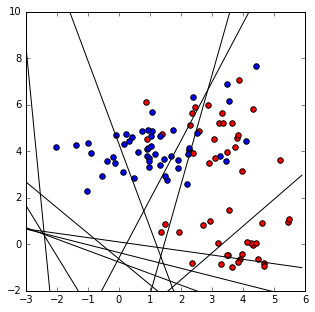

loss: 0.643872360342, w norm: 2.6794052124, W1.norm: 4.21313099501


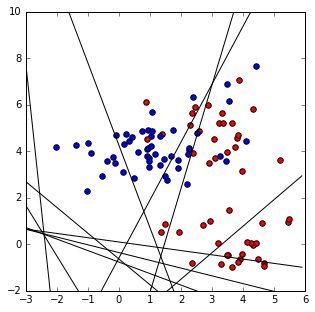

loss: 0.630912720263, w norm: 2.67206716537, W1.norm: 4.21651530983


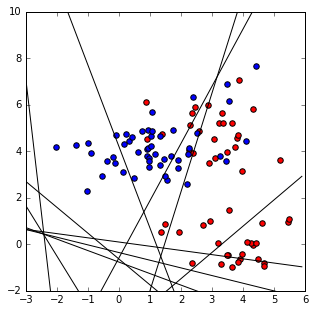

loss: 0.61941982885, w norm: 2.66554331779, W1.norm: 4.21983262726


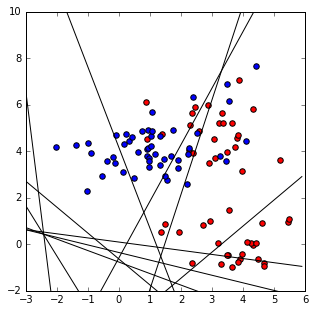

loss: 0.609201808807, w norm: 2.65976285934, W1.norm: 4.22308515134


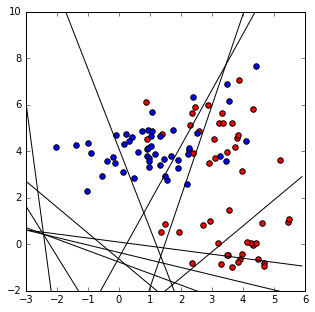

loss: 0.600091136163, w norm: 2.65466165543, W1.norm: 4.22627532491


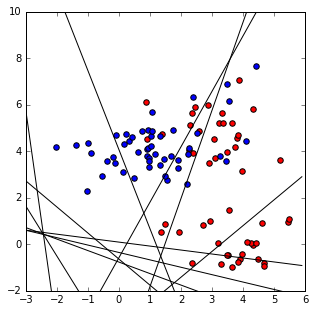

loss: 0.591941992221, w norm: 2.65018105507, W1.norm: 4.22940573966


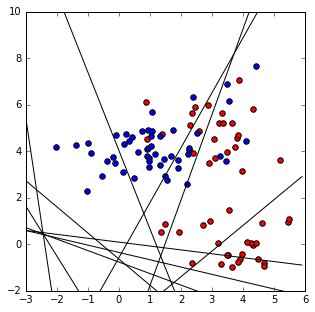

loss: 0.584627794155, w norm: 2.64626765251, W1.norm: 4.23247906541


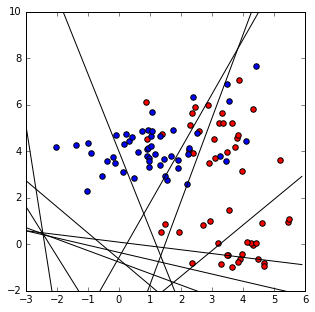

loss: 0.57803880841, w norm: 2.64287352562, W1.norm: 4.2354979946


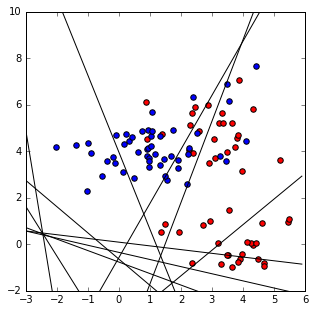

loss: 0.572080099301, w norm: 2.63995480537, W1.norm: 4.23846519994


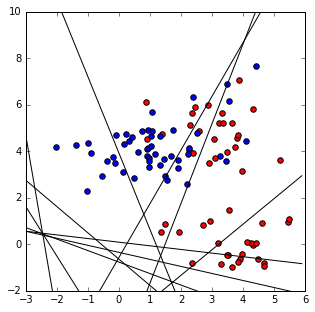

loss: 0.56666957677, w norm: 2.63747143745, W1.norm: 4.24138330199


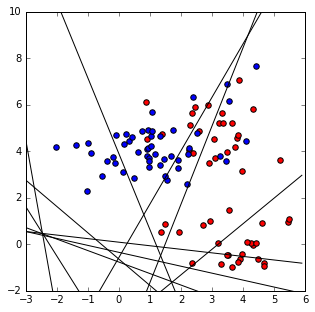

loss: 0.561736328785, w norm: 2.63538813591, W1.norm: 4.24425484564


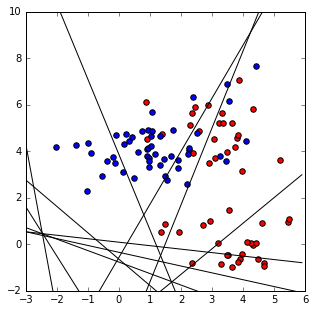

loss: 0.557219120634, w norm: 2.63367152214, W1.norm: 4.2470822829


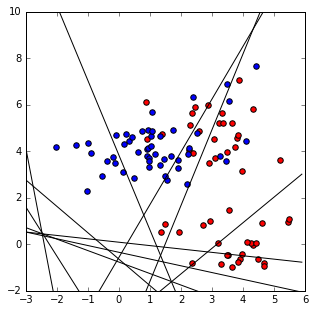

loss: 0.553065072658, w norm: 2.63229250908, W1.norm: 4.24986796124


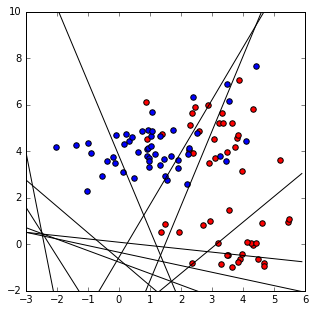

loss: 0.549228520606, w norm: 2.63122367859, W1.norm: 4.25261411625


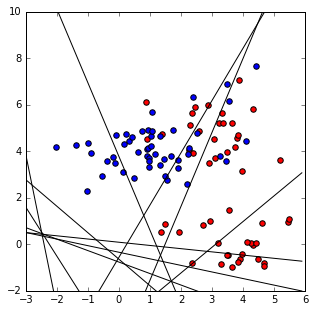

loss: 0.54567003686, w norm: 2.63044071198, W1.norm: 4.25532286773


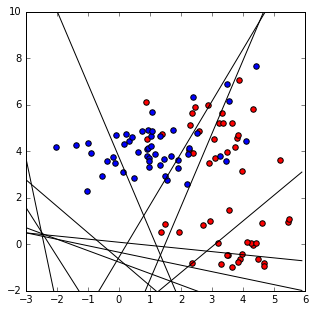

loss: 0.542355550307, w norm: 2.62992095947, W1.norm: 4.25799621808


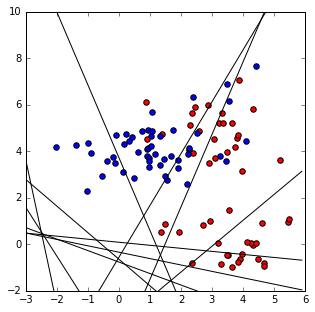

loss: 0.539255616159, w norm: 2.62964439392, W1.norm: 4.26063605318


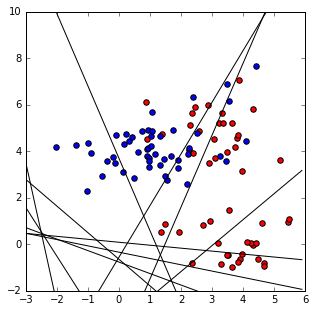

loss: 0.536344758063, w norm: 2.62959194183, W1.norm: 4.26324414411


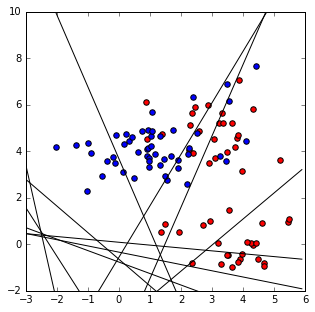

loss: 0.533600946872, w norm: 2.62974691391, W1.norm: 4.26582215075


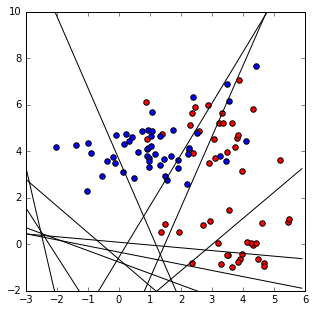

loss: 0.531005086384, w norm: 2.63009333611, W1.norm: 4.26837162551


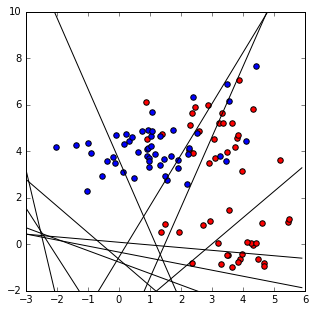

loss: 0.528540637945, w norm: 2.63061738014, W1.norm: 4.27089401815


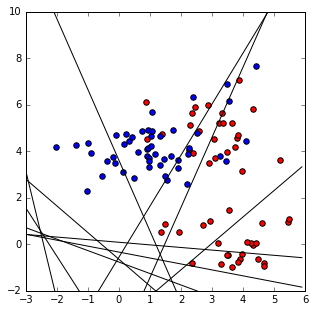

loss: 0.526193249374, w norm: 2.63130569458, W1.norm: 4.27339068052


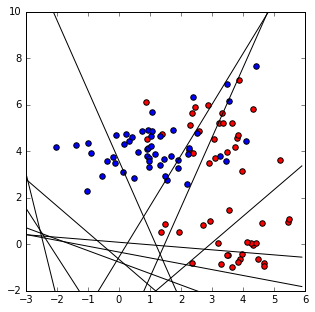

loss: 0.523950449191, w norm: 2.63214612007, W1.norm: 4.27586287157


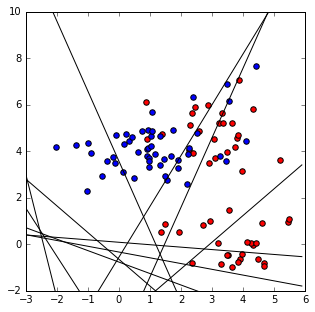

loss: 0.521801405702, w norm: 2.63312768936, W1.norm: 4.27831176263


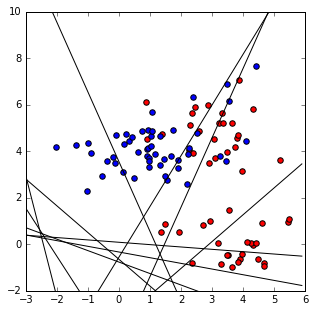

loss: 0.519736688334, w norm: 2.63424038887, W1.norm: 4.2807384425


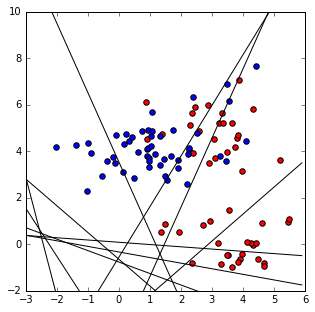

loss: 0.517748080181, w norm: 2.63547468185, W1.norm: 4.28314392245


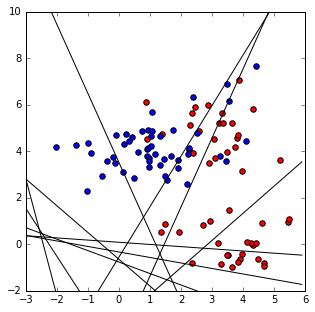

loss: 0.515828414032, w norm: 2.63682174683, W1.norm: 4.2855291412


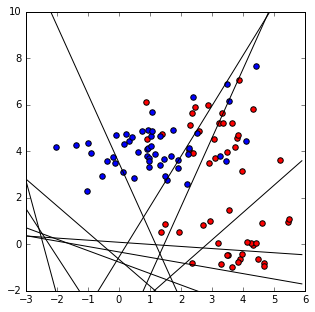

loss: 0.51397142924, w norm: 2.63827419281, W1.norm: 4.28789496968


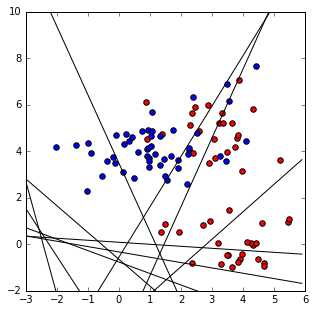

loss: 0.512171651828, w norm: 2.63982391357, W1.norm: 4.29024221547


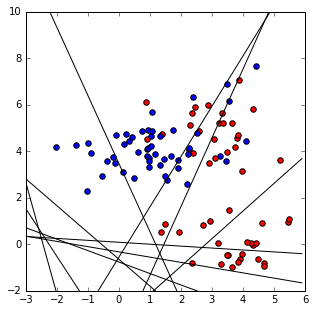

loss: 0.510424282895, w norm: 2.6414642334, W1.norm: 4.29257162721


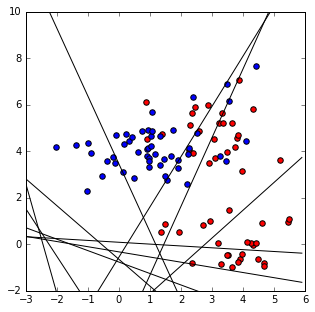

loss: 0.50872510439, w norm: 2.64318919182, W1.norm: 4.29488389853


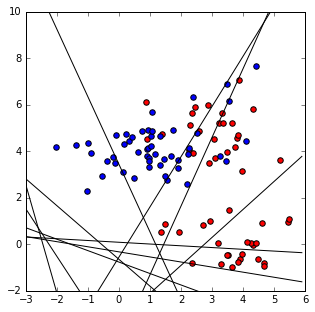

loss: 0.507070419996, w norm: 2.64499235153, W1.norm: 4.29717967221


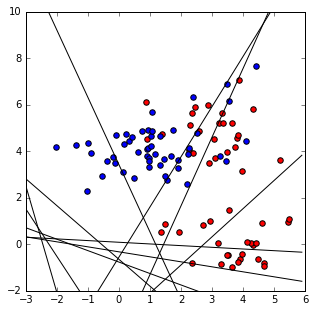

loss: 0.505456972648, w norm: 2.64686894417, W1.norm: 4.29945954359


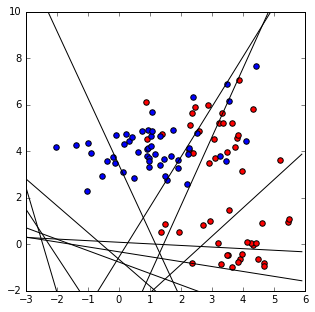

loss: 0.50388188227, w norm: 2.64881324768, W1.norm: 4.30172406415


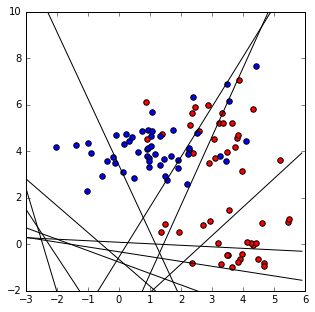

loss: 0.502342607708, w norm: 2.65082073212, W1.norm: 4.30397374456


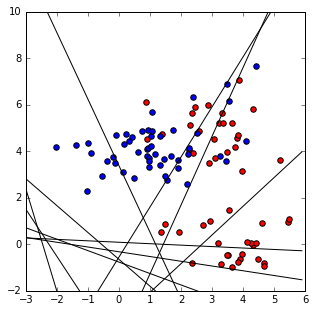

loss: 0.500836889365, w norm: 2.65288734436, W1.norm: 4.30620905788


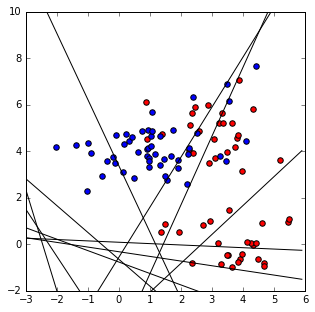

loss: 0.499362725653, w norm: 2.65500855446, W1.norm: 4.30843044218


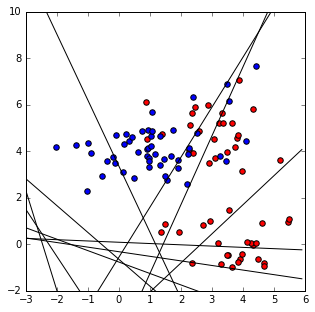

loss: 0.497918335086, w norm: 2.65718102455, W1.norm: 4.3106383033


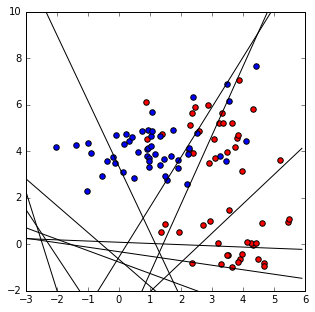

loss: 0.496502125716, w norm: 2.65940093994, W1.norm: 4.31283301727


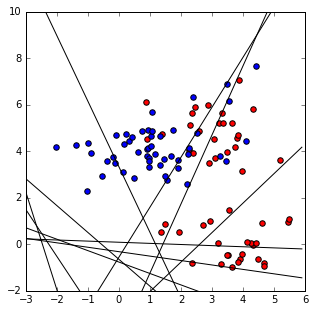

loss: 0.495112669089, w norm: 2.66166520119, W1.norm: 4.31501493259


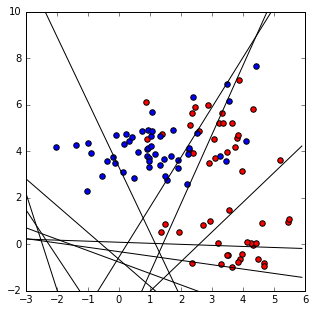

loss: 0.493748686181, w norm: 2.66397047043, W1.norm: 4.31718437221


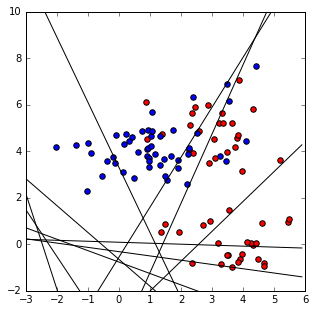

loss: 0.492409025592, w norm: 2.66631364822, W1.norm: 4.31934163573


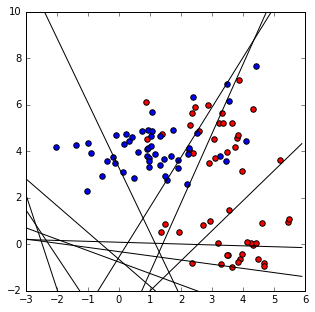

loss: 0.491092641728, w norm: 2.66869258881, W1.norm: 4.32148700089


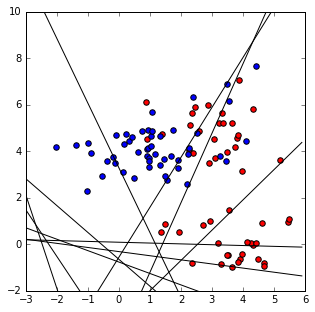

loss: 0.489798591331, w norm: 2.67110466957, W1.norm: 4.32362072553


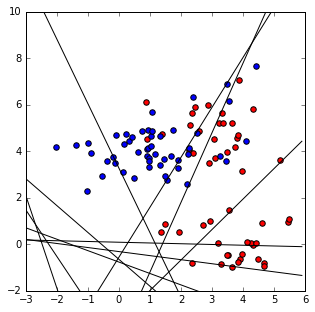

loss: 0.488526012545, w norm: 2.67354726791, W1.norm: 4.32574304897


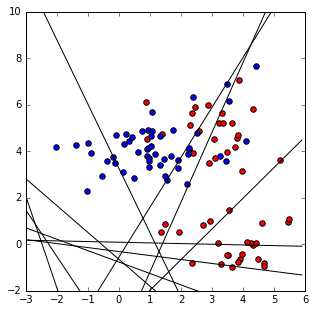

loss: 0.487274120559, w norm: 2.67601847649, W1.norm: 4.32785419362


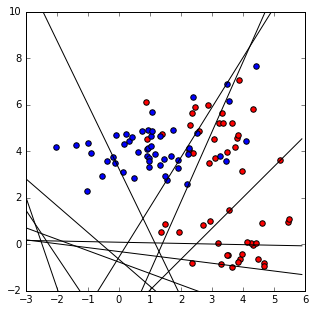

loss: 0.486042206295, w norm: 2.6785159111, W1.norm: 4.32995436625


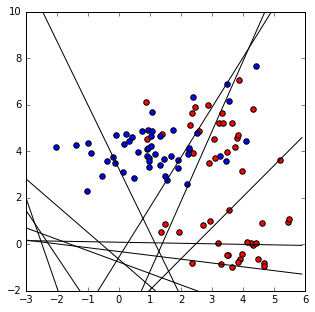

loss: 0.484829603498, w norm: 2.68103814125, W1.norm: 4.33204375918


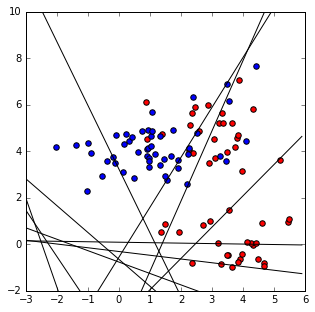

loss: 0.483635700572, w norm: 2.68358278275, W1.norm: 4.33412255142


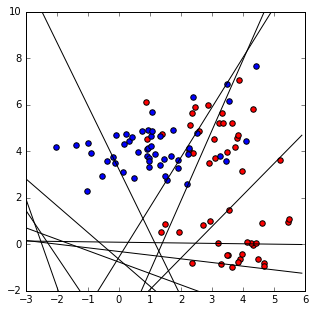

loss: 0.482459938968, w norm: 2.68614840508, W1.norm: 4.33619090987


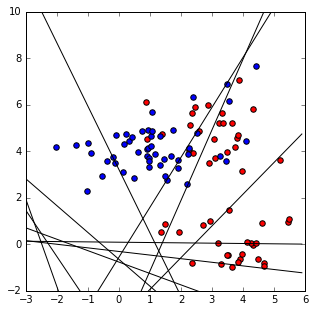

loss: 0.48130179614, w norm: 2.68873357773, W1.norm: 4.3382489901


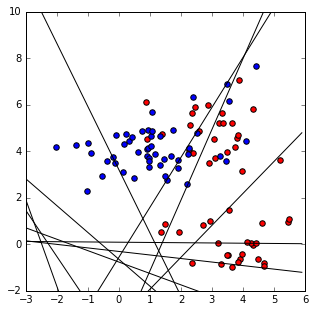

loss: 0.480160778589, w norm: 2.69133639336, W1.norm: 4.34029693728


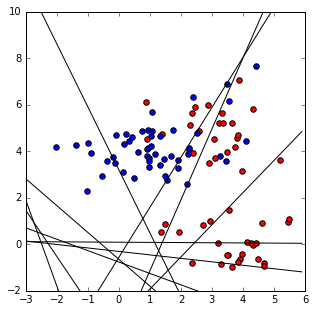

loss: 0.479036435565, w norm: 2.69395589828, W1.norm: 4.34233488712


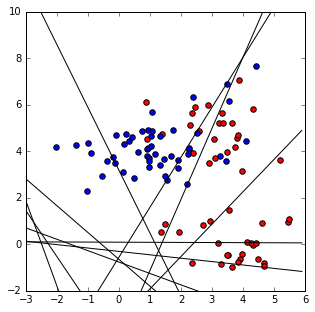

loss: 0.477928341504, w norm: 2.69659042358, W1.norm: 4.34436296661


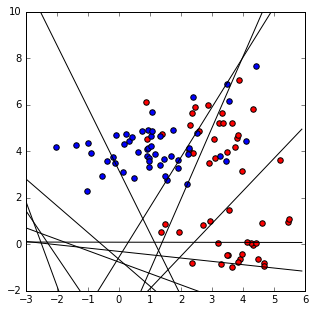

loss: 0.476836090687, w norm: 2.69923877716, W1.norm: 4.34638129471


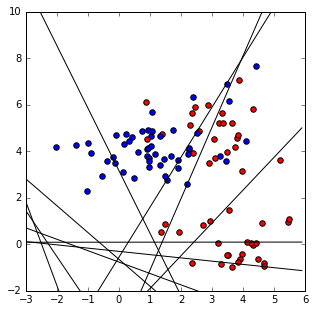

loss: 0.475759302056, w norm: 2.70190024376, W1.norm: 4.3483899829


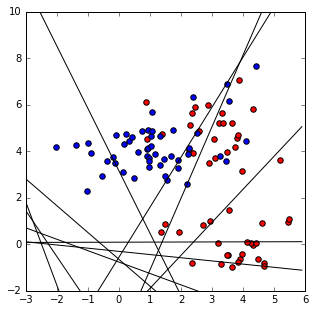

loss: 0.474697621851, w norm: 2.70457291603, W1.norm: 4.35038913596


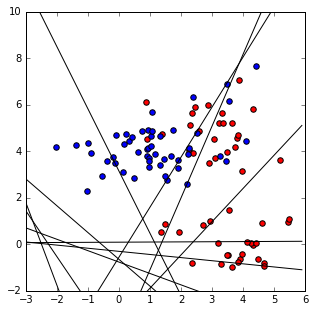

loss: 0.473650707142, w norm: 2.70725655556, W1.norm: 4.35237885245


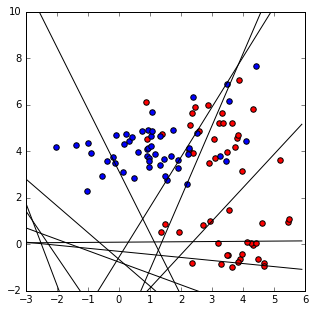

loss: 0.472618234593, w norm: 2.70994949341, W1.norm: 4.35435922515


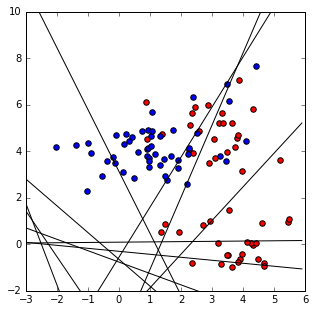

loss: 0.471599894366, w norm: 2.71265149117, W1.norm: 4.35633034158


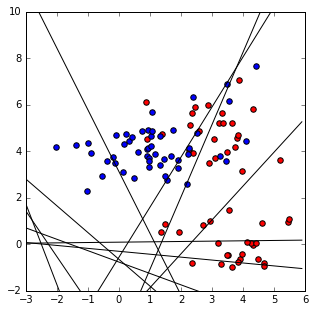

loss: 0.470595389451, w norm: 2.71536111832, W1.norm: 4.35829228445


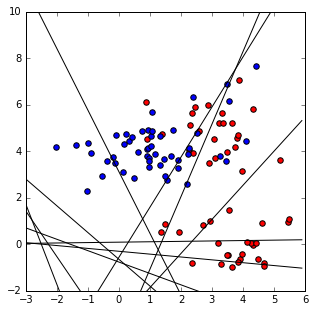

loss: 0.469604439226, w norm: 2.71807789803, W1.norm: 4.36024513209


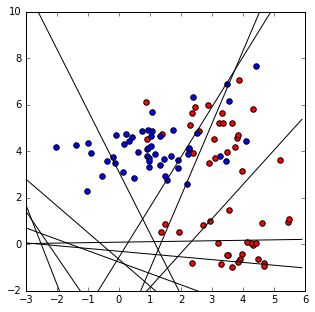

loss: 0.468626771902, w norm: 2.72080087662, W1.norm: 4.3621889587


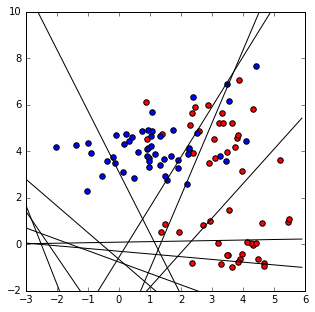

loss: 0.467662130088, w norm: 2.72352933884, W1.norm: 4.36412383485


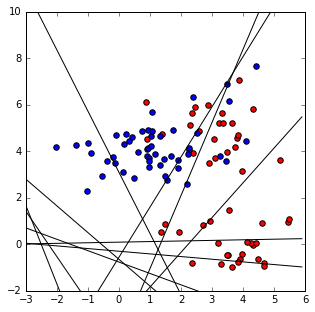

loss: 0.466710258725, w norm: 2.72626280785, W1.norm: 4.36604982761


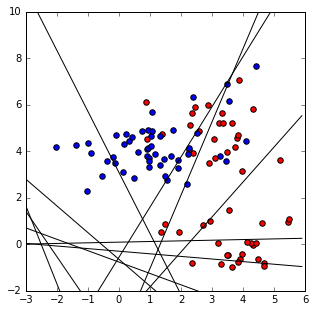

loss: 0.465770918659, w norm: 2.72900056839, W1.norm: 4.36796700098


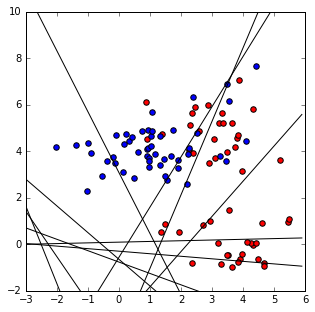

loss: 0.464843872495, w norm: 2.73174190521, W1.norm: 4.36987541605


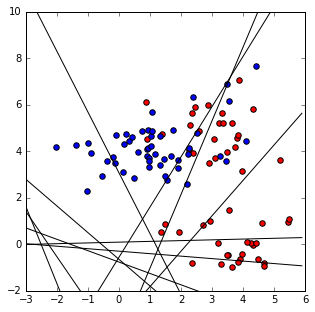

loss: 0.463928898516, w norm: 2.73448634148, W1.norm: 4.37177513135


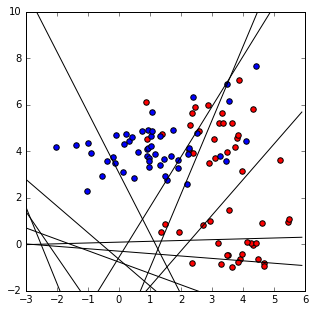

loss: 0.463025774033, w norm: 2.73723316193, W1.norm: 4.37366620298


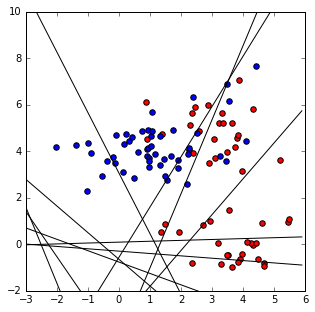

loss: 0.462134290337, w norm: 2.73998212814, W1.norm: 4.3755486848


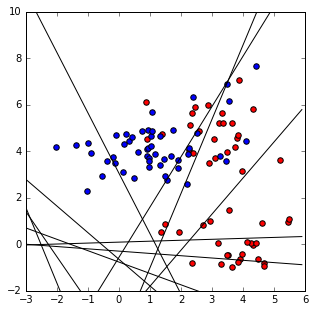

loss: 0.461254236894, w norm: 2.74273252487, W1.norm: 4.37742262866


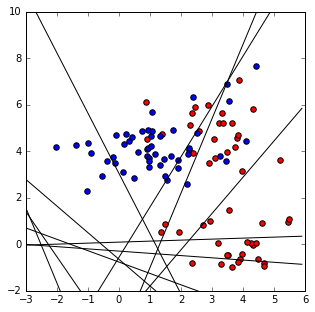

loss: 0.460385412871, w norm: 2.74548411369, W1.norm: 4.37928808453


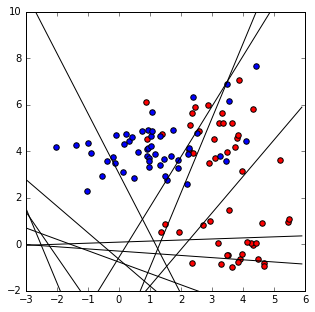

loss: 0.459527627803, w norm: 2.74823641777, W1.norm: 4.38114510075


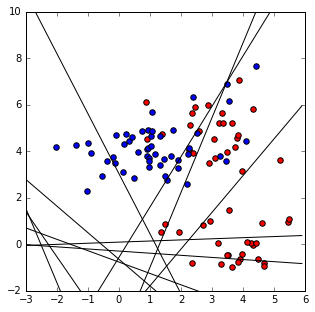

loss: 0.458680692679, w norm: 2.75098872185, W1.norm: 4.38299372406


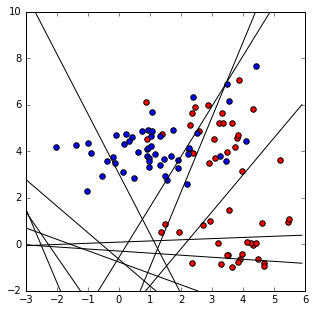

loss: 0.457844422018, w norm: 2.75374078751, W1.norm: 4.38483399979


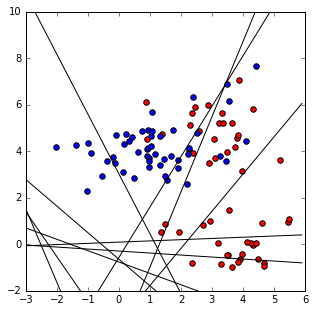

loss: 0.457018641792, w norm: 2.75649261475, W1.norm: 4.38666597202


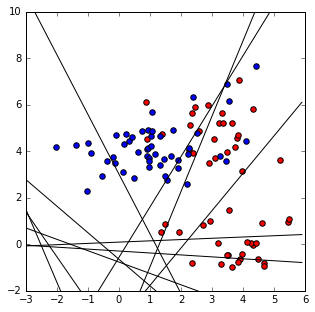

loss: 0.456203171297, w norm: 2.75924324989, W1.norm: 4.38848968362


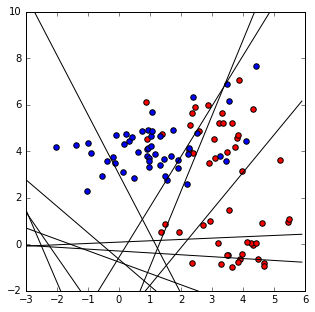

loss: 0.455397841914, w norm: 2.76199293137, W1.norm: 4.39030517634


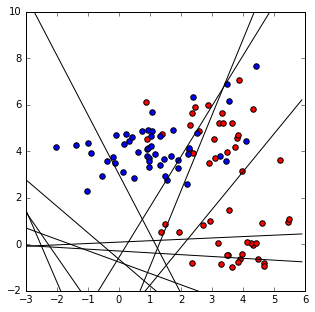

loss: 0.45460249076, w norm: 2.76474094391, W1.norm: 4.39211249099


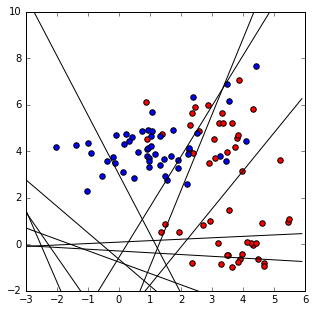

loss: 0.453816955411, w norm: 2.76748728752, W1.norm: 4.39391166744


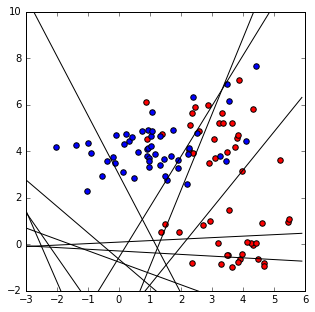

loss: 0.453041071031, w norm: 2.77023148537, W1.norm: 4.39570274475


In [5]:
for epoch in xrange(100):
    loss_val = train()
    draw_state(n_hiddn)
    
    print('loss: {}, w norm: {}, W1.norm: {}'.format(loss_val, 
                                                     np.sqrt(np.sum(w.get_value()**2)), 
                                                     np.sqrt(np.sum(np.sum(W1.get_value()**2, axis=0)))))


In [6]:
p_y_pred = 1/(1+T.exp(-(T.dot(p_H, w) + b)))

predict = theano.function([x], p_y_pred, allow_input_downcast=True)

print predict([[0,3],[4,-2],[3,6],[10,-10]])
print predict(data1).T
print predict(data2).T

[[ 0.33195967]
 [ 0.9648115 ]
 [ 0.4287045 ]
 [ 0.98999227]]
[[ 0.91190033  0.90711315  0.92922879  0.90859752  0.81590664  0.88855522
   0.9388519   0.91944091  0.80185715  0.87196854  0.76444327  0.81539861
   0.92266923  0.93332913  0.93302595  0.91857258  0.93201185  0.88228192
   0.92231163  0.87611073  0.93875118  0.90330304  0.94181284  0.80734973
   0.72866684  0.45954432  0.4937863   0.52731188  0.49648525  0.34727019
   0.66176616  0.7732355   0.73142791  0.29534038  0.27423537  0.64662921
   0.55553217  0.6096177   0.59224589  0.44332687  0.50875916  0.40792156
   0.63487075  0.64230301  0.61692971  0.64607895  0.37872106  0.55105058
   0.23745806  0.35332425]]
[[ 0.2626213   0.34977599  0.36543058  0.30782346  0.32222946  0.25802229
   0.36881157  0.34514814  0.32089201  0.28290585  0.34057519  0.30308095
   0.34990867  0.26018747  0.3136362   0.2558018   0.29350443  0.25737265
   0.26422036  0.27465742  0.30488651  0.25275921  0.40744911  0.30533161
   0.31443679  0.444110

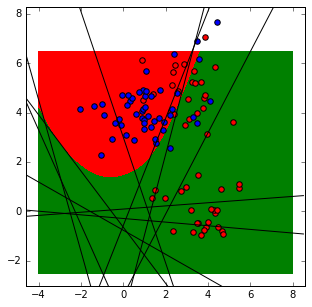

In [7]:
import matplotlib.pyplot as plt

delta = 0.025

x = np.arange(-4.0, 8.0, delta)
y = np.arange(-2.5, 6.5, delta)
X, Y = np.meshgrid(x, y)
contourShape = X.shape

# print X.reshape((-1,1))
meshgridData = np.concatenate((X.reshape((-1,1)), Y.reshape((-1,1))), axis=1)
Z = predict(meshgridData).reshape(contourShape)

levels = [0,.5,1]
CS = plt.contourf(X, Y, Z, levels, colors=('r', 'g'))


draw_state(n_hiddn)
